In [42]:
import tensorflow as tf
import numpy as np

In [43]:
# Create 100 phony x, y data points in NumPy, y = x * 0.1 + 0.3
x_data = np.random.rand(100).astype(np.float32)
y_random = 0.02 * np.random.randn(100).astype(np.float32)
y_data = x_data * 0.1 + 0.3 + y_random

# Try to find values for W and b that compute y_data = W * x_data + b
# (We know that W should be 0.1 and b 0.3, but Tensorflow will
# figure that out for us.)
W = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
b = tf.Variable(tf.zeros([1]))
y = tf.nn.sigmoid(W * x_data + b)

In [44]:
# Minimize the mean squared errors.
loss = tf.reduce_mean(tf.square(y - y_data))
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

In [45]:
# Before starting, initialize the variables.  We will 'run' this first.
init = tf.initialize_all_variables()

In [46]:
# Launch the graph.
sess = tf.Session()
sess.run(init)

In [47]:
sess.run(b)

array([ 0.], dtype=float32)

In [48]:
# Fit the line.
for step in range(201):
    sess.run(train)
    if step % 20 == 0:
        print(step, sess.run(W), sess.run(b))

0 [ 0.38902584] [-0.04981909]
20 [ 0.14690936] [-0.52036673]
40 [ 0.11645403] [-0.6209808]
60 [ 0.12441058] [-0.65201014]
80 [ 0.13990302] [-0.66715759]
100 [ 0.15629473] [-0.678114]
120 [ 0.17209734] [-0.68762779]
140 [ 0.1870113] [-0.6963768]
160 [ 0.20101459] [-0.70454812]
180 [ 0.21414773] [-0.71221077]
200 [ 0.2264629] [-0.71940416]


In [49]:
import matplotlib.pyplot as plt
%matplotlib inline

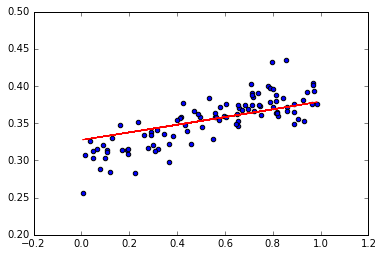

In [51]:
myplot = plt.scatter(x_data, y_data)
xlim = myplot.axes.get_xlim()
pts = np.arange(xlim[0], xlim[1], 0.1)

pts = tf.linspace(xlim[0], xlim[1], 100)
r = tf.nn.sigmoid(pts)
with sess.as_default():
    r = y.eval()
    pts = x_data
#[tf.nn.sigmoid(sess.run(W)*xlim[0]+sess.run(b)), tf.nn.sigmoid(sess.run(W)*xlim[1]+sess.run(b))]
plt.plot(pts, r, 'r')